In [ ]:
!pip3 install --upgrade git+https://github.com/JustAnotherArchivist/snscrape.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-cg256f2a
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-cg256f2a
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 786815dd05681e2421cd03aa9acf5ab5c773bce9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev13+g786815d-py3-none-any.whl size=73302 sha256=1361601a2069cb3ee5e9408a1dd2ec90e80399ad5d870a4571c170b5229d0ca7
  Stored in directory: /tmp/pip-ephem-wheel-cache-8fvmv77s/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [ ]:
import pandas as pd
import ast
import networkx as nx
from sklearn.cluster import SpectralClustering

In [ ]:


def scrape_tweets(trending_topic, num_tweets=1500):
    tweet_data = []
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f"{trending_topic}").get_items()):
        if i >= num_tweets:
            break
        reply_username = tweet.inReplyToUser.username if tweet.inReplyToUser else None
        reply_user_id = tweet.inReplyToUser.id if tweet.inReplyToUser else None
        mentioned_users = [{'username': user.username, 'id': user.id} for user in (tweet.mentionedUsers or [])]
        tweet_data.append({
            'tweet_username': tweet.user.username,
            'tweet_id': tweet.id,
            'tweet_raw_content': tweet.rawContent,
            'is_reply': hasattr(tweet, 'inReplyToUser'),  # Check if the tweet is a reply
            'reply_username': reply_username,
            'reply_user_id': reply_user_id,
            'mentioned_users': mentioned_users
        })
    return pd.DataFrame(tweet_data)

# Scrape tweets for a trending topic
trending_topic = "#ThisWasNotOnTV"
df = scrape_tweets(trending_topic)

# Save the scraped data to a .csv file
df.to_csv(f"{trending_topic}_tweets4.csv", index=False)

In [3]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ast


In [4]:
# Load tweets data from CSV into a DataFrame
tweets_df = pd.read_csv('#ChatGPT_tweets6.csv', skipinitialspace=True)

In [5]:
# Create an empty directed graph
G = nx.DiGraph()

In [6]:
import csv
import ast
import networkx as nx

In [7]:
# Create an empty directed graph
graph = nx.DiGraph()

In [ ]:
import pandas as pd
import networkx as nx
import ast

In [8]:
# Read the CSV file
df = pd.read_csv('#ChatGPT_tweets6.csv')
print(df)

       tweet_username             tweet_id  \
0      itrpservicespk  1658444406465372168   
1          Francienta  1658444388115128321   
2      harrywignall14  1658444371581075460   
3          SamQuill00  1658444283391750147   
4        Yu_tsukuyomi  1658444247559970816   
...               ...                  ...   
1495     NlendNyounai  1658397794401394688   
1496     izakomtrikru  1658397792497291270   
1497  SaeedAh35988219  1658397785954357248   
1498        teunemans  1658397753603506177   
1499  mohammadali_im1  1658397706648256513   

                                      tweet_raw_content  is_reply  \
0     Hareem Shah Threatens to Expose Maulana Fazl-u...      True   
1     Para #ChatGPT el presidente de Chile aún es Se...      True   
2     @NFT_GOD Does asking/planning/writing with cha...      True   
3     Can confirm that Chat GPT is a Thelemite. http...      True   
4     #ChatGPT \n\n既存の多数派による価値観に依存しない独自の感性、というのがより貴重...      True   
...                              

In [9]:



# Create an empty graph
G = nx.Graph()

# Iterate over each row
for _, row in df.iterrows():
    tweet_username = row['tweet_username'].strip()
    reply_username = str(row['reply_username']).strip() if pd.notnull(row['reply_username']) else ''
    mentioned_users = ast.literal_eval(row['mentioned_users'].strip()) if pd.notnull(row['mentioned_users']) else []

    # Add tweet username as a node if not already present
    if tweet_username not in G:
        G.add_node(tweet_username)

    # Check if it is a reply tweet and add reply username as a node if not empty
    if reply_username:
        if reply_username not in G:
            G.add_node(reply_username)
        G.add_edge(tweet_username, reply_username)

    # Check if mentioned users list is not empty and add nodes and edges
    if mentioned_users:
        for mentioned_user in mentioned_users:
            username = mentioned_user['username']
            user_id = mentioned_user['id']
            if username not in G:
                G.add_node(username)
            G.add_edge(tweet_username, username)

# Print the nodes and edges of the graph
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

# Print the count of rows processed
print("Number of rows processed:", len(df))


Nodes: ['itrpservicespk', 'Francienta', 'harrywignall14', 'NFT_GOD', 'SamQuill00', 'Yu_tsukuyomi', 'info9_ind', 'crypaudio', 'ChatGPT_AR', 'White667', 'NoujaimGiovanni', 'anchandamono', 'AIK0009', 'YouTube', 'rwdatasci', 'RoyalStatSoc', 'RSS_DSS', 'a0939670106', 'Mar3_AI', 'codeamel', 'nemuugal', 'T72U_C', 'PriyanshuKr_7', 'ishiikatshtoshi', 'xA9NpU37iVkJ2rb', 'orthodoxanglicn', 'AnAwkAnthro', 'analyticsinme', 'casadosaralho', 'felipefr4nco', 'chandrakumar', 'ChargedAI', 'itsPaulAi', 'idmariano', 'anacrsl', 'soulslidesaway1', 'Muraimuneaki', 'benjaminyeurch', 'pressecitron', 'droitajay', 'DataChaz', 'TheoKL', 'ICTEvangelist', 'ToilyKurbanov', 'dihnamic', 'CNIL', 'LUsineDigitale', 'janosh0815', 'MarkusKark', 'stagerbn', 'RangaYogeshwar', 'galipeau', 'DPatelG01', 'aleenam0min', 'KickrTechnology', 'pragat001', 'SureshV53899047', 'ANNYYUSZ', 'JonErlichman', 'karenraycosta', 'Ollietarkaka', 'livemint', 'richardturrin', 'psb_dc', 'BetaMoroney', 'efipm', 'BrettKing', 'SpirosMargaris', 'mikefl

In [16]:
# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Remove isolated nodes
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Print the nodes and edges of the modified graph
print("Nodes after removing self-loops and isolated nodes:", list(G.nodes()))
print("Edges after removing self-loops and isolated nodes:", list(G.edges()))


Nodes after removing self-loops and isolated nodes: ['harrywignall14', 'NFT_GOD', 'AIK0009', 'YouTube', 'rwdatasci', 'RoyalStatSoc', 'RSS_DSS', 'a0939670106', 'Mar3_AI', 'ishiikatshtoshi', 'xA9NpU37iVkJ2rb', 'orthodoxanglicn', 'AnAwkAnthro', 'casadosaralho', 'felipefr4nco', 'ChargedAI', 'itsPaulAi', 'idmariano', 'anacrsl', 'benjaminyeurch', 'pressecitron', 'TheoKL', 'ICTEvangelist', 'dihnamic', 'CNIL', 'LUsineDigitale', 'janosh0815', 'MarkusKark', 'stagerbn', 'RangaYogeshwar', 'DPatelG01', 'aleenam0min', 'ANNYYUSZ', 'JonErlichman', 'richardturrin', 'psb_dc', 'BetaMoroney', 'efipm', 'BrettKing', 'SpirosMargaris', 'mikeflache', 'enricomolinari', 'Khulood_Almani', 'chidambara09', 'SHOTUS2', 'mk18', 'ArturGalata', 'nafisalam', 'jmattmiller', 'RAlexJimenez', 'bamitav', 'sainthillayre', 'PedroMa50023005', 'SigaGazetaBR', 'petitdekpe', 'drdelali', 'santalucia_inst', '_Herce', 'youraimastery', 'VWO', 'plasticbbyart', 'paleofuture', 'devconfza', 'cloudandthings', 'Runninghill', 'revista_gestion

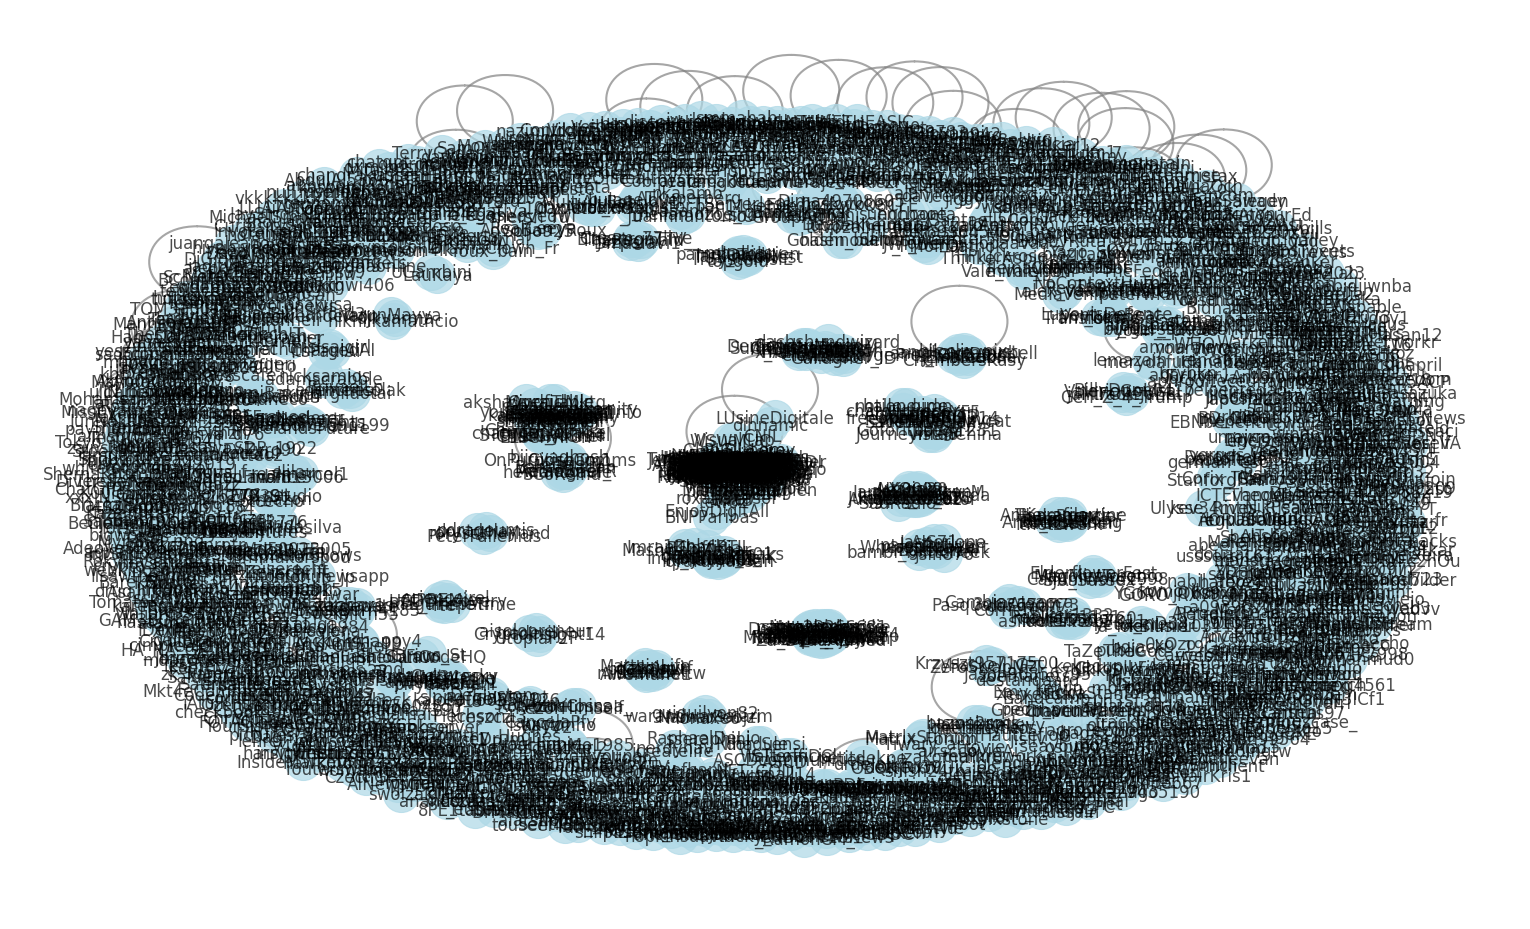

In [10]:
# Set figure size and dpi
fig = plt.figure(figsize=(10, 6), dpi=150)

# Draw the graph with adjusted parameters
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_color='lightblue', edge_color='gray', linewidths=0.5, alpha=0.7)

# Customize edge appearance
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, label_pos=0.5)

# Show the graph
plt.show()

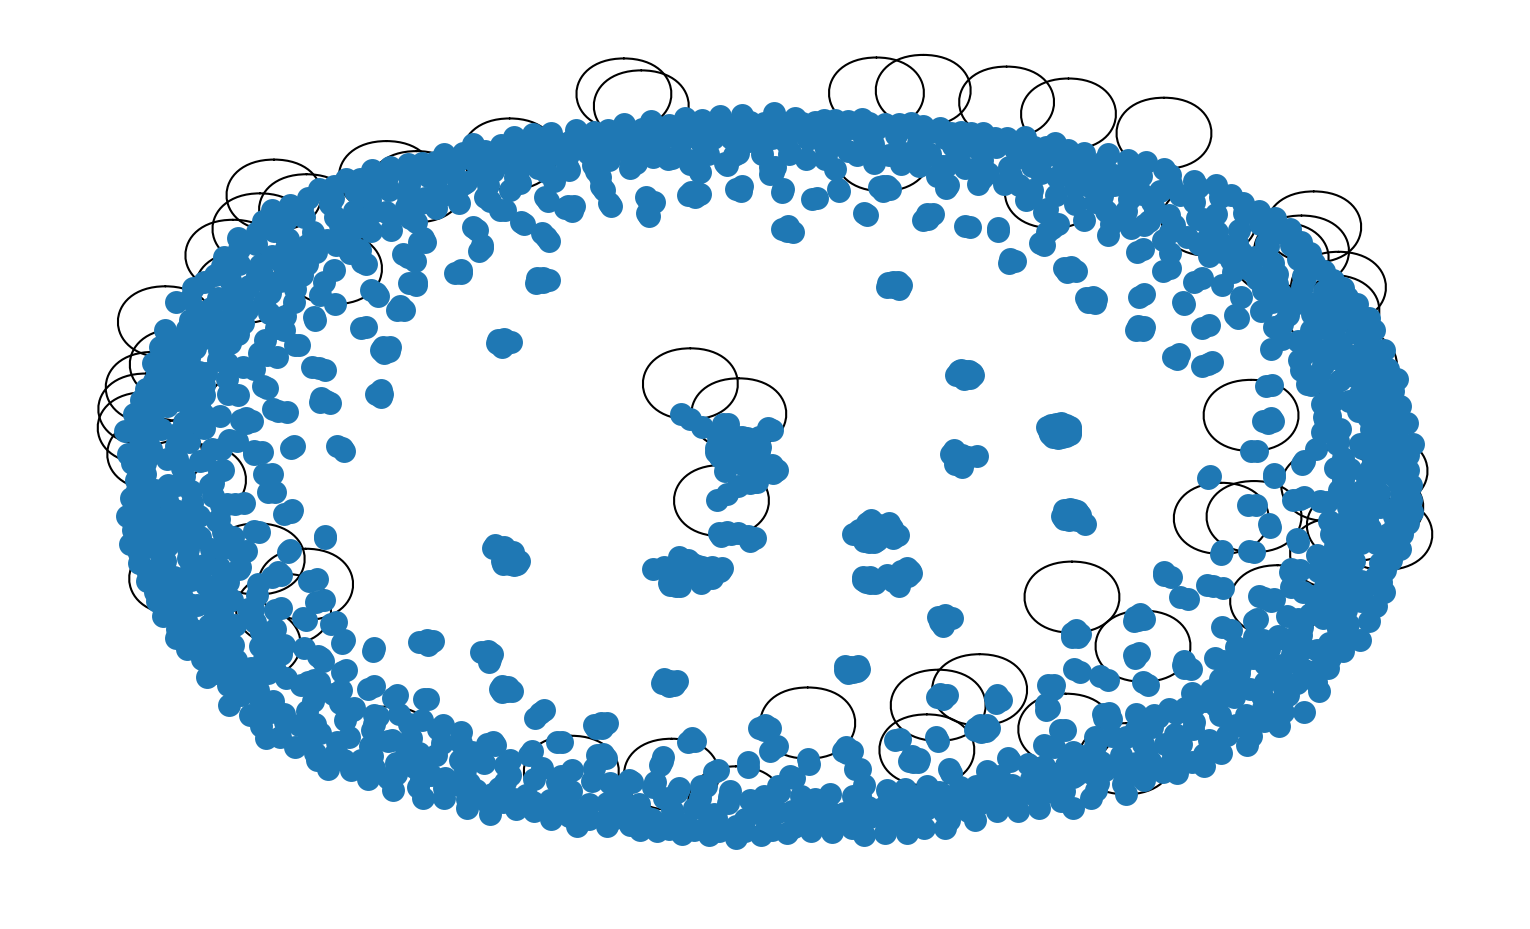

In [11]:
# Set figure size and dpi
fig = plt.figure(figsize=(10, 6), dpi=150)

# Draw the graph with adjusted parameters
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=100)

# Display the graph
plt.show()

In [12]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Number of communities: 273
Community 2 : ['harrywignall14', 'NFT_GOD']
Community 11 : ['AIK0009', 'YouTube', 'kentakig', 'keypoint001', 'IamLuckyBoy_M', 'takumatsuchida', 'gaogao_o2', 'interlab_inc', 'dokondokon', 'XQin20', 'jackson1688', 'JuliaPalombe', 'SudRadio', 'yk7011', 'Amachi_creator']
Community 12 : ['rwdatasci', 'RoyalStatSoc', 'RSS_DSS']
Community 13 : ['a0939670106', 'Mar3_AI']
Community 18 : ['ishiikatshtoshi', 'xA9NpU37iVkJ2rb']
Community 19 : ['orthodoxanglicn', 'AnAwkAnthro']
Community 21 : ['casadosaralho', 'felipefr4nco']
Community 23 : ['ChargedAI', 'itsPaulAi', 'thisisaigirl']
Community 24 : ['idmariano', 'anacrsl']
Community 27 : ['benjaminyeurch', 'pressecitron']
Community 30 : ['TheoKL', 'ICTEvangelist']
Community 32 : ['dihnamic', 'CNIL', 'LUsineDigitale', 'RLDI_Lamy']
Community 33 : ['janosh0815', 'MarkusKark', 'stagerbn', 'RangaYogeshwar', 'SHOTUS2']
Community 35 : ['DPatelG01', 'aleenam0min']
Community 39 : ['ANNYYUSZ', 'JonErlichman']
Community 44 : ['richar

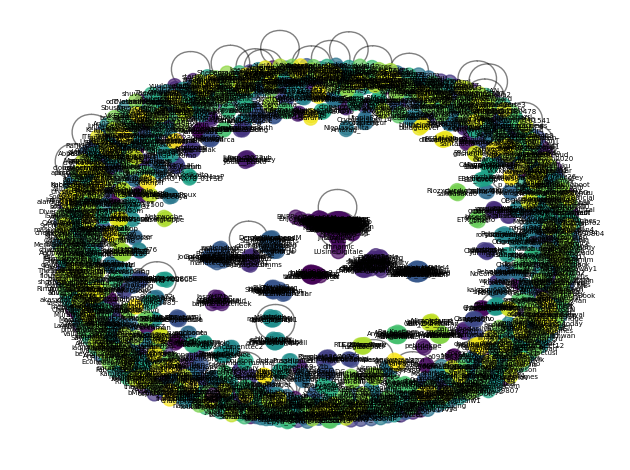

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community
import ast

# Assuming your graph variable is named 'G'

# Convert the graph to an undirected graph if needed
G_undirected = G.to_undirected()

# Apply community detection using Louvain algorithm
partition = community.best_partition(G_undirected)

# Create a dictionary to store communities and their associated usernames
communities = {}

# Iterate over the nodes and assign them to their respective communities
for node, community_id in partition.items():
    # Get the username associated with the node (assuming it's stored as a node label)
    username = node
    
    # Check if the community_id is already present in the communities dictionary
    if community_id in communities:
        communities[community_id].append(username)
    else:
        communities[community_id] = [username]

# Remove communities with only one person
communities = {community_id: usernames for community_id, usernames in communities.items() if len(usernames) > 1}

# Print the number of communities
num_communities = len(communities)
print("Number of communities:", num_communities)

# Print the usernames in each community
for community_id, usernames in communities.items():
    print("Community", community_id, ":", usernames)

# Generate the graph layout
layout = nx.spring_layout(G_undirected)

# Draw the nodes with community colors
node_colors = [partition[node] for node in G_undirected.nodes()]
nx.draw_networkx_nodes(G_undirected, layout, node_color=node_colors, cmap='viridis', node_size=100, alpha=0.7)

# Draw the edges
nx.draw_networkx_edges(G_undirected, layout, alpha=0.5)

# Draw the labels with custom style
label_options = {
    'font_size': 5,
    'font_color': 'black',
    'font_family': 'sans-serif',
}
nx.draw_networkx_labels(G_undirected, layout, labels={node: node for node in G_undirected.nodes()}, **label_options)

# Show the plot
plt.axis('off')
plt.tight_layout()
plt.show()


Number of communities: 273
Community 2 : ['harrywignall14', 'NFT_GOD']
Community 11 : ['AIK0009', 'YouTube', 'kentakig', 'keypoint001', 'IamLuckyBoy_M', 'takumatsuchida', 'gaogao_o2', 'interlab_inc', 'dokondokon', 'XQin20', 'jackson1688', 'JuliaPalombe', 'SudRadio', 'yk7011', 'Amachi_creator']
Community 12 : ['rwdatasci', 'RoyalStatSoc', 'RSS_DSS']
Community 13 : ['a0939670106', 'Mar3_AI']
Community 18 : ['ishiikatshtoshi', 'xA9NpU37iVkJ2rb']
Community 19 : ['orthodoxanglicn', 'AnAwkAnthro']
Community 21 : ['casadosaralho', 'felipefr4nco']
Community 23 : ['ChargedAI', 'itsPaulAi', 'thisisaigirl']
Community 24 : ['idmariano', 'anacrsl']
Community 27 : ['benjaminyeurch', 'pressecitron']
Community 30 : ['TheoKL', 'ICTEvangelist']
Community 32 : ['dihnamic', 'CNIL', 'LUsineDigitale', 'RLDI_Lamy']
Community 33 : ['janosh0815', 'MarkusKark', 'stagerbn', 'RangaYogeshwar', 'SHOTUS2']
Community 35 : ['DPatelG01', 'aleenam0min']
Community 39 : ['ANNYYUSZ', 'JonErlichman']
Community 43 : ['richar

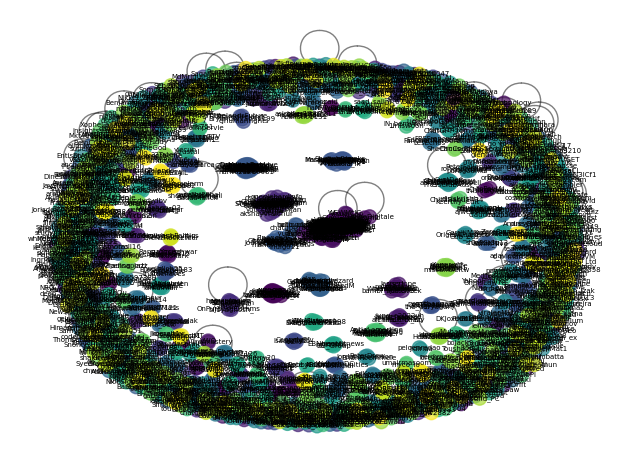

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community
import ast
import csv

# Assuming your graph variable is named 'G'

# Convert the graph to an undirected graph if needed
G_undirected = G.to_undirected()

# Apply community detection using Louvain algorithm
partition = community.best_partition(G_undirected)

# Create a dictionary to store communities and their associated usernames
communities = {}

# Iterate over the nodes and assign them to their respective communities
for node, community_id in partition.items():
    # Get the username associated with the node (assuming it's stored as a node label)
    username = node
    
    # Check if the community_id is already present in the communities dictionary
    if community_id in communities:
        communities[community_id].append(username)
    else:
        communities[community_id] = [username]

# Remove communities with only one person
communities = {community_id: usernames for community_id, usernames in communities.items() if len(usernames) > 1}

# Print the number of communities
num_communities = len(communities)
print("Number of communities:", num_communities)

# Print the usernames in each community
for community_id, usernames in communities.items():
    print("Community", community_id, ":", usernames)

# Store community data in a CSV file
with open('community_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Community ID', 'Usernames'])
    for community_id, usernames in communities.items():
        writer.writerow([community_id, ', '.join(usernames)])

# Generate the graph layout
layout = nx.spring_layout(G_undirected)

# Draw the nodes with community colors
node_colors = [partition[node] for node in G_undirected.nodes()]
nx.draw_networkx_nodes(G_undirected, layout, node_color=node_colors, cmap='viridis', node_size=100, alpha=0.7)

# Draw the edges
nx.draw_networkx_edges(G_undirected, layout, alpha=0.5)

# Draw the labels with custom style
label_options = {
    'font_size': 5,
    'font_color': 'black',
    'font_family': 'sans-serif',
}
nx.draw_networkx_labels(G_undirected, layout, labels={node: node for node in G_undirected.nodes()}, **label_options)

# Show the plot
plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
!pip install python-louvain


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.6/228.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 111.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 84.6 MB/s eta 0:00:00
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=c53e045a7346049cdab394bb3e29c8f02da49426bbc6ec69ad21ae907b342243
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df

In [15]:
import networkx as nx
import community.community_louvain as cm

# Assuming your graph variable is named 'G'

# Convert the graph to an undirected graph if needed
G_undirected = G.to_undirected()

# Apply community detection using the Louvain algorithm with overlapping communities
partition = cm.best_partition(G_undirected, weight='weight')

# Create a dictionary to store the overlapping communities
overlapping_communities = {}

# Iterate over the nodes and their respective communities
for node, community_id in partition.items():
    if community_id not in overlapping_communities:
        overlapping_communities[community_id] = []
    overlapping_communities[community_id].append(node)

# Remove communities with only one user
overlapping_communities = {cid: nodes for cid, nodes in overlapping_communities.items() if len(nodes) > 1}

# Check if any community overlaps with another community
overlapping_detected = False
for cid1, nodes1 in overlapping_communities.items():
    for cid2, nodes2 in overlapping_communities.items():
        if cid1 != cid2 and set(nodes1).intersection(nodes2):
            overlapping_detected = True
            break

# Print the overlapping communities
if overlapping_detected:
    print("Overlapping communities detected.")
else:
    print("No overlapping communities detected.")


No overlapping communities detected.


In [1]:
!curl -sSL https://cli.github.com/install.sh | sh


sh: 2: Syntax error: newline unexpected
curl: (23) Failed writing body (240 != 1378)


In [2]:
!gh auth login



/bin/bash: gh: command not found


In [3]:
!gh repo clone <https://github.com/kalsoom-waseem/CliqueDetectioninTwitter.git>


/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `gh repo clone <https://github.com/kalsoom-waseem/CliqueDetectioninTwitter.git>'


In [4]:
!mv <file_path.ipynb> <cloned_repository_directory>


/bin/bash: -c: line 0: syntax error near unexpected token `<'
/bin/bash: -c: line 0: `mv <file_path.ipynb> <cloned_repository_directory>'


In [5]:
%cd <cloned_repository_directory>


[Errno 2] No such file or directory: '<cloned_repository_directory>'
/content


In [6]:
!gh commit -m "Upload Colab notebook"
!gh push


/bin/bash: gh: command not found
/bin/bash: gh: command not found
